In [204]:
import pandas as pd 
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy import stats

In [3]:
# i need to explore the effect of the different features on the price of laptops.

In [5]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [9]:
# import the dataset from website and create funcation to check status.

def load_data(url,file_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name,'wb') as file:
            file.write(response.content)


In [15]:
# download the dataset .
load_data(filepath,"laptop_pricing.csv")
file_Name = "laptop_pricing.csv"
# to read csv file 
df = pd.read_csv(file_Name, header=0)

In [62]:
df.head(5)
# funcation to check all the null value in the datset.

def missing_va(dataset):
    missing_col = dataset.isnull()
    for column in missing_col.columns.values.tolist():
        # need to sum the number of nul in each column
        nullcount = missing_col[column].sum()
        if nullcount > 0:
            print(f" the columns name is {column} ")
            print(f" this column name has {nullcount} missing value")
        else: 
            print(f" the column name <-- {column} --> is clean from the missing value.")
    return

In [63]:
missing_va(df)

 the column name <-- Unnamed: 0.1 --> is clean from the missing value.
 the column name <-- Unnamed: 0 --> is clean from the missing value.
 the column name <-- Manufacturer --> is clean from the missing value.
 the column name <-- Category --> is clean from the missing value.
 the column name <-- GPU --> is clean from the missing value.
 the column name <-- OS --> is clean from the missing value.
 the column name <-- CPU_core --> is clean from the missing value.
 the column name <-- Screen_Size_inch --> is clean from the missing value.
 the column name <-- CPU_frequency --> is clean from the missing value.
 the column name <-- RAM_GB --> is clean from the missing value.
 the column name <-- Storage_GB_SSD --> is clean from the missing value.
 the column name <-- Weight_pounds --> is clean from the missing value.
 the column name <-- Price --> is clean from the missing value.
 the column name <-- Price-binned --> is clean from the missing value.
 the column name <-- Screen-Full_HD --> 

In [ ]:
df.head(5)
# funcation to check all the null value in the datset.

def missing_va(dataset):
    missing_col = dataset.isnull()
    for column in missing_col.columns.values.tolist():
        # need to sum the number of nul in each column
        nullcount = missing_col[column].sum()
        if nullcount > 0:
            print(f" the columns name is {column} ")
            print(f" this column name has {nullcount} missing value")
        else: 
            print(f" the column name <-- {column} --> is clean from the missing value.")
    return

In [101]:
# this funcation to check the type of data and if there is any inf or missing data in all columns to fix the pervios error.
def conv_1(dataset):
    for column in dataset.columns.tolist():
        inf_data = np.isinf(pd.to_numeric(dataset[column], errors='coerce'))
        #inf_data_1 = dataset[column].str.contains('inf')
        print(inf_data.value_counts())
    return
conv_1(df)

False    238
Name: Unnamed: 0.1, dtype: int64
False    238
Name: Unnamed: 0, dtype: int64
False    238
Name: Manufacturer, dtype: int64
False    238
Name: Category, dtype: int64
False    238
Name: GPU, dtype: int64
False    238
Name: OS, dtype: int64
False    238
Name: CPU_core, dtype: int64
False    238
Name: Screen_Size_inch, dtype: int64
False    238
Name: CPU_frequency, dtype: int64
False    238
Name: RAM_GB, dtype: int64
False    238
Name: Storage_GB_SSD, dtype: int64
False    238
Name: Weight_pounds, dtype: int64
False    238
Name: Price, dtype: int64
False    238
Name: Price-binned, dtype: int64
False    238
Name: Screen-Full_HD, dtype: int64
False    238
Name: Screen-IPS_panel, dtype: int64


In [66]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
# delete columns dont need in this columns and dosnt effect of anything
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],axis=1, inplace=True)

# visualize the individual feature

#### we need to check regrrision plot to the parameters below 

##### i need to check how is the parameter below effect of the price. 

In [153]:
# filter gthe data to create the regression plot
parame_plot= ["Screen_Size_inch","CPU_frequency","Weight_pounds", "Price"]
df_plot = df[parame_plot]

In [169]:
    def regress(d_set,eff_data):
        for column in d_set.columns.values.tolist():
            corre_pa = d_set[column].corr(d_set[eff_data])
            if column != "Price":
                sns.regplot(x=column,y=eff_data,data=d_set)
                plt.ylim(0,)
                plt.ylabel(f"{eff_data}")
                plt.xlabel(f"{column}")
                plt.show()
                print(f"correlation of price and {column} is {corre_pa}")
                print("")
                print("---------------------------------------------")
        return

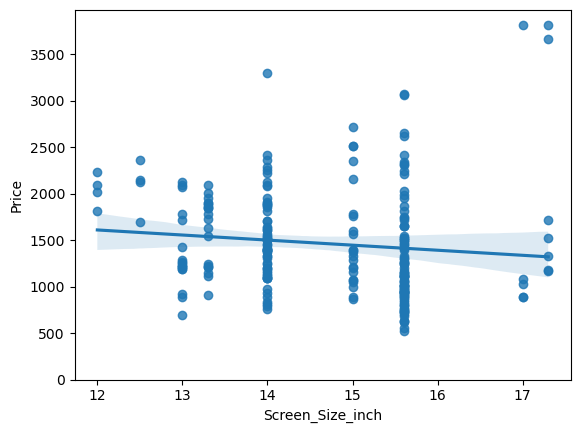

correlation of price and Screen_Size_inch is -0.11064420817118273

---------------------------------------------


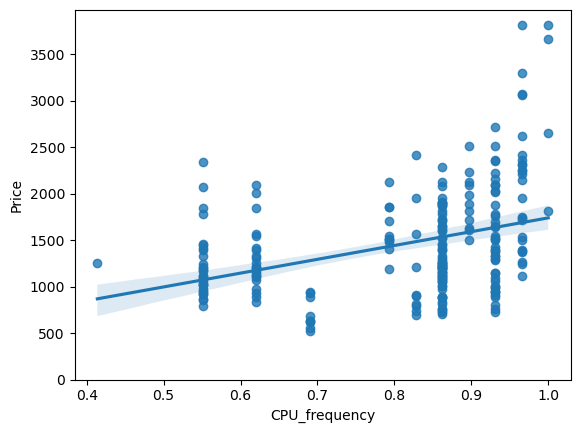

correlation of price and CPU_frequency is 0.3666655589258861

---------------------------------------------


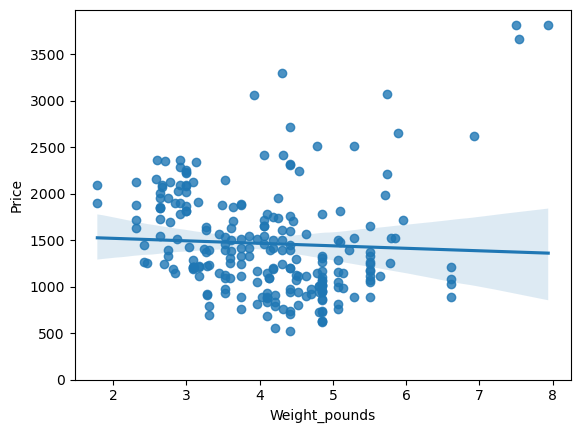

correlation of price and Weight_pounds is -0.05031225837751548

---------------------------------------------


In [170]:
regress(df_plot,"Price")

# ganerate box plot for the different feature categorical.

In [178]:
data_catg = ["Category","GPU","OS","CPU_core","RAM_GB","Storage_GB_SSD","Price"]
df_catg = df[data_catg]
df_catg

,Category,GPU,OS,CPU_core,RAM_GB,Storage_GB_SSD,Price
0,4,2,1,5,8,256,978
1,3,1,1,3,4,256,634
2,3,1,1,7,8,256,946
3,4,2,1,5,8,128,1244
4,4,2,1,7,8,256,837
...,...,...,...,...,...,...,...
233,4,2,1,7,8,256,1891
234,3,2,1,5,8,256,1950
235,4,2,1,5,8,256,2236
236,3,3,1,5,6,256,883


In [183]:
def box_plot_f(d_set,eff_data):
    for column in d_set.columns.values.tolist():
        if column != "Price":
            sns.boxplot(x=column,y=eff_data,data=d_set)
            plt.title(f"the garegorical boxplot of {column} and {eff_data}")
            plt.ylabel(f"{eff_data}")
            plt.xlabel(f"{column}")
            plt.show()
            print("")
            print("---------------------------------------------")
    return

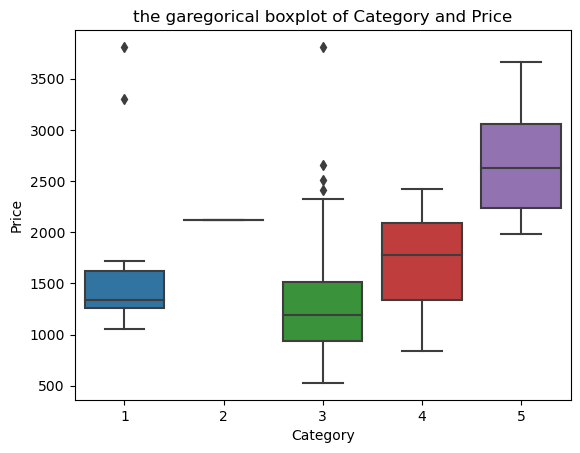


---------------------------------------------


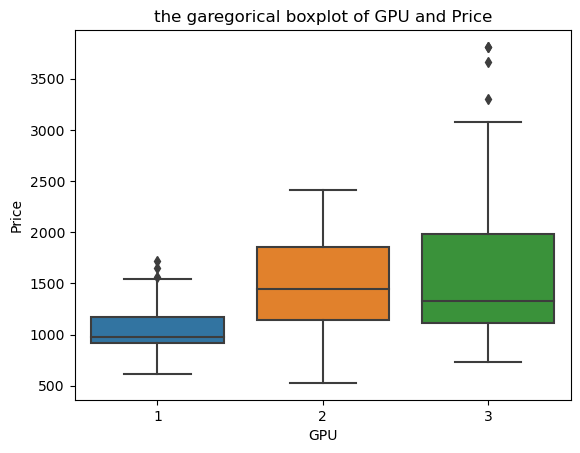


---------------------------------------------


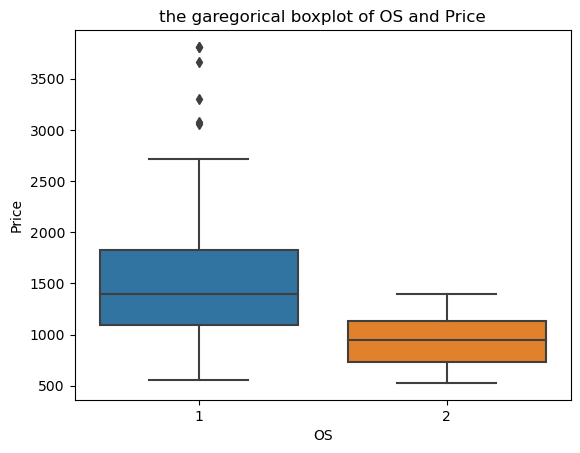


---------------------------------------------


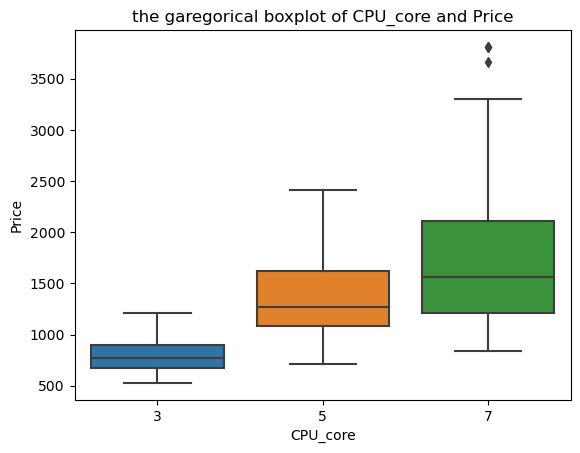


---------------------------------------------


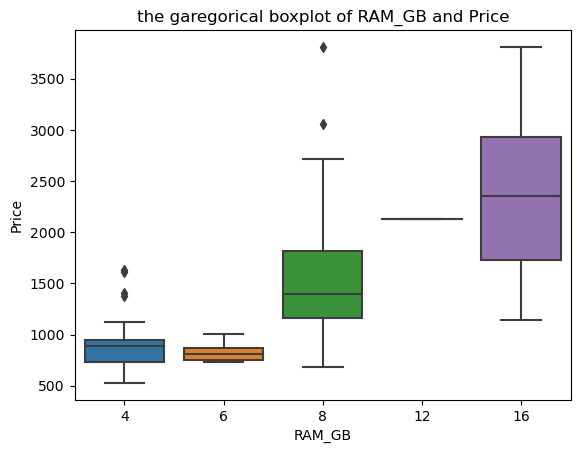


---------------------------------------------


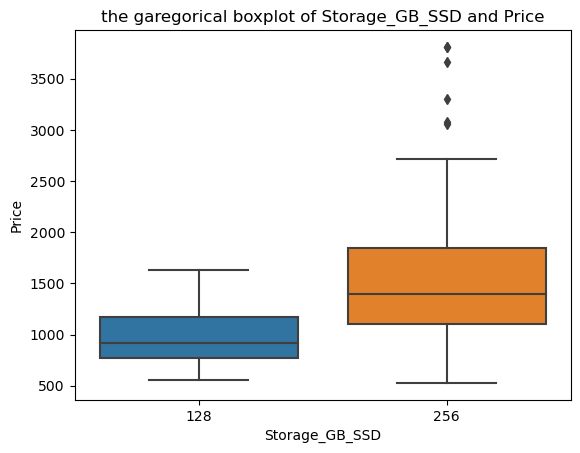


---------------------------------------------


In [184]:
box_plot_f(df_catg,"Price")

In [104]:
def correlation_t(dataset,Y_axis):
    for column in dataset.columns.values.tolist():
        # this code cuse i cannt create plot for the same column it will be issue and error.
        if column != Y_axis:
            sns.regplot(x=column,y=Y_axis,data=dataset)
            # to start the Y axis from 0
            plt.ylim(0,)
    return

# descriptive statistical analysis.

In [192]:
# just i need to descriptive for the object type only.
df.describe(include="object")

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


# groupby and pivot tables.

In [238]:
# to create pivot toble in two steps.
#1- create list for the data or column which you want to collect in object.
#2- create the object for groupby funcation.
df_GB = df[["GPU","CPU_core","Price"]]
group_by_df = df_GB.groupby(["GPU","CPU_core"],as_index=False).mean()
print(group_by_df)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [239]:
# now i can create pivot table. column perffered to be the uniqe value with less value to be easy to read.
grouped_pivot = group_by_df.pivot(index="GPU",columns="CPU_core")
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


#### create pcolor plot

In [ ]:
#how create pcolor plot.
#1- subplots()

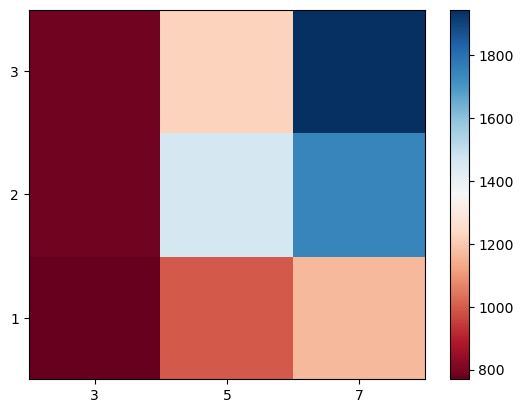

In [240]:
# to craete impathy data table.
fig,ax=plt.subplots()
im=ax.pcolor(grouped_pivot,cmap="RdBu")
# create label name of the y & x
row_labels= grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
# MOVE  the ticks nad label to the center.
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5,minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5,minor=False)
# to insert thr label 
ax.set_xticklabels(row_labels,minor=False)
ax.set_yticklabels(col_labels,minor=False)

#create thr right side color bar.
fig.colorbar(im)

In [241]:
from scipy import stats

# this funcation will help to extract all result and calculate the pearson -correlation and [p-value for all the float/int column in table.
# pearcon_p(dataset, the value which is want to calculate the corelai)
def pearcon_p(dateset,value_fix):
    numarical = df.select_dtypes(include=['float64','int64']).columns.values.tolist()
    for column in numarical :
        pearson_coef,P_value = stats.pearsonr(dateset[column],dateset[value_fix])
        
        if P_value <= .001 :
            print(f'{column}')
            print(f" P_value is {P_value} so we have strong evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            print('-----------------------------------------')
        elif  P_value > .001 and P_value <= 0.05:
            print(f'{column}')
            print(f" P_value is {P_value} so we have modernate evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            #print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            print('-----------------------------------------')
        elif P_value > .05 and P_value < 0.1  :
            print(f'{column}')
            print(f" P_value is {P_value} so we have weak evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            #print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            print('-----------------------------------------')
        elif P_value > .1:
            print(f'{column}')
            print(f" P_value is {P_value} so we have No evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            #print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            print('-----------------------------------------')
        else:
             print(f"there is comething wrong with the value with pearson {pearson_coef} or p_value {P_value} ")
    return

In [243]:
pearcon_p(df,"Price")

Category
 P_value is 7.225696235806862e-06 so we have strong evidance in this correlation 
 and the pearson correlation coefficient is stronge because the result is: 0.28624275581264114
-----------------------------------------
GPU
 P_value is 6.166949698364282e-06 so we have strong evidance in this correlation 
 and the pearson correlation coefficient is stronge because the result is: 0.28829819888814273
-----------------------------------------
OS
 P_value is 0.0005696642559246759 so we have strong evidance in this correlation 
 the pearson correlation coefficient is -0.22172980114827376 so with this result nigative correlation
-----------------------------------------
CPU_core
 P_value is 7.912950127009034e-14 so we have strong evidance in this correlation 
 and the pearson correlation coefficient is stronge because the result is: 0.4593977773355117
-----------------------------------------
Screen_Size_inch
 P_value is 0.08853397846830627 so we have weak evidance in this correlation